## light example
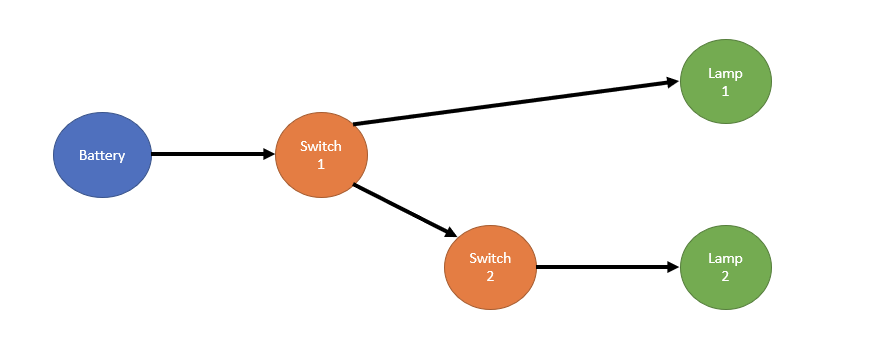


#### Possible causes and their prior probabilities:
- Battery is flat (0.2)
- Switch 1 is in wrong position (0.5)
- Switch 2 is in wrong position (0.5)
- Lamp 1 is broken (0.1)
- Lamp 2 is broken (0.1) 

assumption: lamp states are on or off or broken

#### Possible actions and their costs:
- Measure battery (3)
- Replace battery (5)
- Toggle switch 1 (2)
- Toggle switch 2 (2)
- Observe lamp 1 (1)
- Observe lamp 2 (1)
- Replace lamp 1 (6)
- Replace lamp 2 (6

#### Scenario:
- I need lamp 2 to be on but is not.

#### Question:
- What is the best series of actions I should take?


In [1]:
# imports
import os
import matplotlib.pyplot as plt
from pylab import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display,HTML

In [2]:
# create influence diagram
diag = gum.InfluenceDiagram()

## Structure

### variables

In [3]:
# variables
B  = diag.addChanceNode(gum.LabelizedVariable('B','Battery',["ok","flat"])) 
S1 = diag.addChanceNode(gum.LabelizedVariable('S1','Switch 1',["pos on","pos off"])) 
S2 = diag.addChanceNode(gum.LabelizedVariable('S2','Switch 2',["pos on","pos off"])) 
L1 = diag.addChanceNode(gum.LabelizedVariable('L1','Light 1',["on","off", "broken"])) 
L2 = diag.addChanceNode(gum.LabelizedVariable('L2','Light 2',["on","off", "broken"])) 

# arcs
diag.addArc(B, S1) # battery to switch 1
diag.addArc(S1, L1) # switch 1 to light 1
diag.addArc(S1, S2) # switch 1 to switch 2
diag.addArc(S2, L2) # switch 2 to light 2

### variables cpt's

In [4]:
# cpt of battery: ok or flat 
diag.cpt(B)[0] = 0.8
diag.cpt(B)[1] = 0.2 # battery flat

# cpt of switch 1: position 1 or 2 
diag.cpt(S1)[0] = 0.5 # pos on
diag.cpt(S1)[1] = 0.5 # pos off

# cpt of switch 2: position 1 or 2 
diag.cpt(S2)[0] = 0.5 # pos on
diag.cpt(S2)[1] = 0.5 # pos off

# cpt of lamp 1: on or off or broken
diag.cpt(L1)[0] = [0.45, 0.45, 0.1]
diag.cpt(L1)[1] = [0.45, 0.45, 0.1] 

# cpt of lamp 2: on or off or broken
diag.cpt(L2)[0] = [0.45, 0.45, 0.1]
diag.cpt(L2)[1] = [0.45, 0.45, 0.1] 

### decisions

In [5]:
# Measure or replace battery 
BMeasure=diag.addDecisionNode(gum.LabelizedVariable('BMeasure', 'Measure', ["yes", "no"])) # cost 3
BReplace=diag.addDecisionNode(gum.LabelizedVariable('BReplace', 'Replace', ["yes", "no"])) # cost 5
diag.addArc(BMeasure, B) # battery measure to battery
diag.addArc(BReplace, B) # battery replace to battery

#Toggle switch 1 / 2
S1Toggle=diag.addDecisionNode(gum.LabelizedVariable('S1Toggle', 'Toggle', ["yes", "no"])) # cost 2
S2Toggle=diag.addDecisionNode(gum.LabelizedVariable('S2Toggle', 'Toggle', ["yes", "no"])) # cost 2
diag.addArc(S1Toggle, S1)  
diag.addArc(S2Toggle, S2)  

#Observe or replace lamp 1
L1Observe=diag.addDecisionNode(gum.LabelizedVariable('L1Observe', 'Observe', ["yes", "no"])) # cost 1
L1Replace=diag.addDecisionNode(gum.LabelizedVariable('L1Replace', 'Replace', ["yes", "no"])) # cost 6
diag.addArc(L1Observe, L1)
diag.addArc(L1Replace, L1)

#Observe or replace lamp 2
L2Observe=diag.addDecisionNode(gum.LabelizedVariable('L2Observe', 'Observe', ["yes", "no"])) # cost 1
L2Replace=diag.addDecisionNode(gum.LabelizedVariable('L2Replace', 'Replace', ["yes", "no"])) # cost 6
diag.addArc(L2Observe, L2)
diag.addArc(L2Replace, L2)

### utility

In [6]:
U=diag.addUtilityNode(gum.LabelizedVariable("U", "U", 1))

#diag.addArc(B, U)
#diag.addArc(S1, U)
#diag.addArc(S2, U)
#diag.addArc(L1, U)
diag.addArc(L2, U)

diag.addArc(BMeasure, U)
diag.addArc(BReplace, U)
diag.addArc(S1Toggle, U)
diag.addArc(S2Toggle, U)
diag.addArc(L1Observe, U)
diag.addArc(L1Replace, U)
diag.addArc(L2Observe, U)
diag.addArc(L2Replace, U)

# add values to states of utility
vars = ["BMeasure", "BReplace", "S1Toggle", "S2Toggle", "L1Observe", "L1Replace", "L2Observe", "L2Replace"]
costs = [-3, -5, -2, -2, -1, -6, -1, -6]

pot = diag.utility('U')  # get all permutations via potential object

for i in pot.loopIn():  # go through potential
    u = 0   # initialize u
    d = i.todict()   # transform to dict
    for v in range(len(vars)):   # check values exist and if so add costs
        if vars[v] in d:
            if d[vars[v]] == 'yes':    # all decisions are yes/no
                u = u + costs[v]
    if "L2" in d:
        if d["L2"] == "on":
            u = u + 40
        else:
            u = u + 0
    del d['U']
    diag.utility(U)[d] = u  # add utility to state
    print(str(d) + "   :" + str(u)) 


{'L2': 'on', 'BMeasure': 'yes', 'BReplace': 'yes', 'S1Toggle': 'yes', 'S2Toggle': 'yes', 'L1Observe': 'yes', 'L1Replace': 'yes', 'L2Observe': 'yes', 'L2Replace': 'yes'}   :14
{'L2': 'off', 'BMeasure': 'yes', 'BReplace': 'yes', 'S1Toggle': 'yes', 'S2Toggle': 'yes', 'L1Observe': 'yes', 'L1Replace': 'yes', 'L2Observe': 'yes', 'L2Replace': 'yes'}   :-26
{'L2': 'broken', 'BMeasure': 'yes', 'BReplace': 'yes', 'S1Toggle': 'yes', 'S2Toggle': 'yes', 'L1Observe': 'yes', 'L1Replace': 'yes', 'L2Observe': 'yes', 'L2Replace': 'yes'}   :-26
{'L2': 'on', 'BMeasure': 'no', 'BReplace': 'yes', 'S1Toggle': 'yes', 'S2Toggle': 'yes', 'L1Observe': 'yes', 'L1Replace': 'yes', 'L2Observe': 'yes', 'L2Replace': 'yes'}   :17
{'L2': 'off', 'BMeasure': 'no', 'BReplace': 'yes', 'S1Toggle': 'yes', 'S2Toggle': 'yes', 'L1Observe': 'yes', 'L1Replace': 'yes', 'L2Observe': 'yes', 'L2Replace': 'yes'}   :-23
{'L2': 'broken', 'BMeasure': 'no', 'BReplace': 'yes', 'S1Toggle': 'yes', 'S2Toggle': 'yes', 'L1Observe': 'yes', 'L1Rep

Influence Diagram{
  chance: 5,
  utility: 1,
  decision: 8,
  arcs: 21,
  domainSize: 18432
}


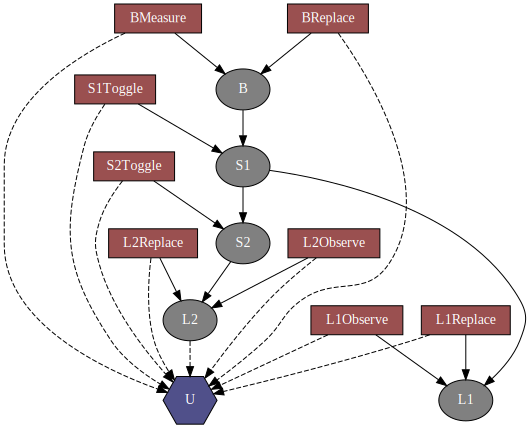

In [7]:
print(diag)
gnb.showInfluenceDiagram(diag, size=60)


# inference

In [17]:
# create inference
ie = gum.ShaferShenoyLIMIDInference(diag) 
diagvars = diag.names()

In [18]:
# total order of decisions => proper influence diagram
ie.addNoForgettingAssumption(["BMeasure","S1Toggle", "S2Toggle", "L1Observe", "L2Observe", "BReplace", "L1Replace", "L2Replace"])

In [19]:
# set evidence

# L2 off, S2 on, S1 on, L1 on
#ie.setEvidence({'L2':1, "S2":0,"S1":0,"L1":0})

ie.setEvidence({'L2':0})

In [20]:
# perform inference
try:
    ie.makeInference()
except gum.GumException as e:
    print(e)

In [21]:
# results: posteriors of variables
for i in diagvars:
    if diag.isChanceNode(i):
        print(ie.posterior(i))


  S1               |
pos on   |pos off  |
---------|---------|
 0.5000  | 0.5000  |


  L2                         |
on       |off      |broken   |
---------|---------|---------|
 1.0000  | 0.0000  | 0.0000  |


  B                |
ok       |flat     |
---------|---------|
 0.8000  | 0.2000  |


  L1                         |
on       |off      |broken   |
---------|---------|---------|
 0.4500  | 0.4500  | 0.1000  |


  S2               |
pos on   |pos off  |
---------|---------|
 0.5000  | 0.5000  |



In [22]:
# results: posteriors of decisions
for i in diagvars:
    if diag.isDecisionNode(i):
        print(ie.posterior(i))


  S2Toggle         |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  S1Toggle         |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  L1Observe        |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  L1Replace        |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  L2Replace        |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  BReplace         |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  BMeasure         |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


  L2Observe        |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |



In [23]:
# results: posterior of utility
for i in diagvars:
    if diag.isUtilityNode(i):
        print(ie.posterior(i))


                                                       ||  L1Observe        |
L1Repl|S2Togg|L2Obse|L2Repl|L2    |BMeasu|S1Togg|BRepla||yes      |no       |
------|------|------|------|------|------|------|------||---------|---------|
yes   |yes   |yes   |yes   |on    |yes   |yes   |yes   || 1.0000  | 0.0000  |
no    |yes   |yes   |yes   |on    |yes   |yes   |yes   || 0.0000  | 0.0000  |
yes   |no    |yes   |yes   |on    |yes   |yes   |yes   || 0.0000  | 0.0000  |
no    |no    |yes   |yes   |on    |yes   |yes   |yes   || 0.0000  | 0.0000  |
yes   |yes   |no    |yes   |on    |yes   |yes   |yes   || 0.0000  | 0.0000  |
no    |yes   |no    |yes   |on    |yes   |yes   |yes   || 0.0000  | 0.0000  |
[...372 more line(s) ...]
yes   |no    |yes   |no    |broken|no    |no    |no    || 0.0000  | 0.0000  |
no    |no    |yes   |no    |broken|no    |no    |no    || 0.0000  | 0.0000  |
yes   |yes   |no    |no    |broken|no    |no    |no    || 0.0000  | 0.0000  |
no    |yes   |no    |no    |broken|no

In [24]:
gnb.flow.row(ie.optimalDecision("BMeasure"), ie.optimalDecision("BReplace"),
             ie.optimalDecision("S1Toggle"), ie.optimalDecision("S2Toggle"),
             ie.optimalDecision("L1Observe"), ie.optimalDecision("L1Replace"),
             ie.optimalDecision("L2Observe"), ie.optimalDecision("L2Replace"))

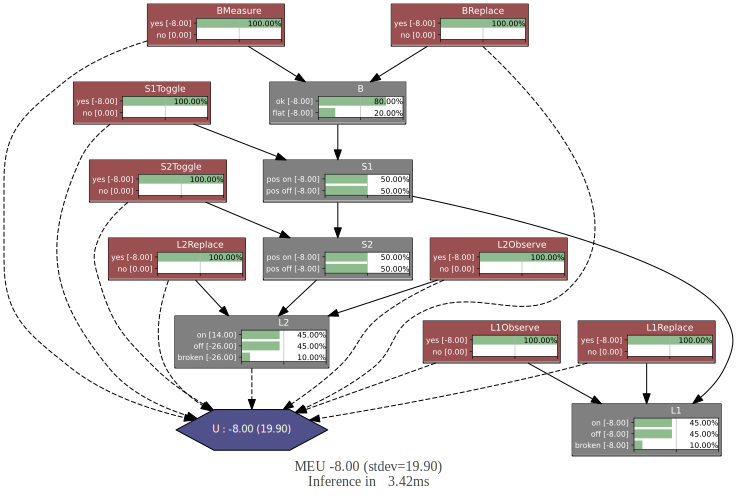

In [25]:
gnb.showInference(diag, engine=ie, size=15)